# Training a Classifier

##loading and normalizing CIFAR10

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data',train=True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train= False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 4, shuffle = False, num_workers = 2)

classes = ('plane','car','bird', 'cat', 'deer', 'dog','frog','horse','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


plane deer  car  car


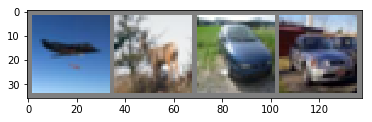

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img /2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    
dataiter = iter(trainloader)
images, lab = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(''.join('%5s' %classes[lab[j]] for j in range(4)))

##Define a Convolution Neural Network

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        conv1_out = self.pool(F.relu(self.conv1(x)))
        conv2_out = self.pool(F.relu(self.conv2(conv1_out)))
        conv2_out = conv2_out.view(-1, 16*5*5)
        fc1_out = F.relu(self.fc1(conv2_out))
        fc2_out = F.relu(self.fc2(fc1_out))
        output = self.fc3(fc2_out)
        return output
    
net = Net()

##Define a Loss function and optimizer

In [10]:
import torch.optim as optim
from torch.autograd import Variable

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

##Train the network

In [16]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(Variable(inputs))
        loss = criterion(outputs, Variable(labels))
        loss.backward()
        optimizer.step()
        
        running_loss += loss
        
        if i%2000 ==1999:
            print('[%d, %5d] loss : %.3f' %(epoch+1, i+1, running_loss /2000))
            running_loss=0.0
            
print('Finished Training')

[1,  2000] loss : 2.229
[1,  4000] loss : 1.882
[1,  6000] loss : 1.696
[1,  8000] loss : 1.592
[1, 10000] loss : 1.532
[1, 12000] loss : 1.492
[2,  2000] loss : 1.413
[2,  4000] loss : 1.390
[2,  6000] loss : 1.385
[2,  8000] loss : 1.337
[2, 10000] loss : 1.315
[2, 12000] loss : 1.307
Finished Training


##Test the network on the test data

GT:   cat  ship  ship plane


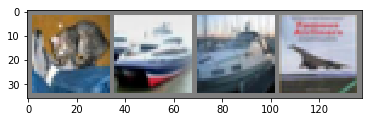

In [22]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GT: '+' '.join('%5s' %classes[labels[j]] for j in range(4)))

In [23]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs, 1)

print('Predicted : '+ ' '.join('%5s' %(classes[int(predicted[j])]) for j in range(4)))

Predicted :   cat   car   car plane


In [38]:
correct = 0
total = 0

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' %(100*correct/total))

Accuracy of the network on the 10000 test images: 53 %


In [41]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs, 1)
    
    c = (predicted == Variable(labels)).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * float(class_correct[i]) / float(class_total[i])))

Accuracy of plane :  9 %
Accuracy of   car : 15 %
Accuracy of  bird : 13 %
Accuracy of   cat :  4 %
Accuracy of  deer : 25 %
Accuracy of   dog :  4 %
Accuracy of  frog :  0 %
Accuracy of horse :  4 %
Accuracy of  ship :  4 %
Accuracy of truck : 17 %


##Training on GPU

In [54]:
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_capability(0))
print(torch.cuda.device(0))
device = torch.cuda.device(0)
#print(device)

0
GeForce GTX 1080 Ti
(6, 1)
